# Data Skaling and Normalization.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [5]:
data = {
    # 'name': ['John', 'Anna', 'Peter', 'Linda'],
    'age': [25, 30, 35, 40],
    'height': [150, 155, 160, 165],
    'weight': [50, 60, 70, 80],
    # 'location': ['New York', 'Paris', 'Berlin', 'London'],    
}

In [6]:
df = pd.DataFrame(data)
df

,age,height,weight
0,25,150,50
1,30,155,60
2,35,160,70
3,40,165,80


# StandardSkaler (from -3 to +3)

In [10]:
# import the skalar
sakalr = StandardScaler()
# fit the skalar on data
skaled_df = sakalr.fit_transform(df)
print(skaled_df)
print("____________________________________\n")
df1 = pd.DataFrame(skaled_df, columns=df.columns)
print(df1)


[[-1.34164079 -1.34164079 -1.34164079]
 [-0.4472136  -0.4472136  -0.4472136 ]
 [ 0.4472136   0.4472136   0.4472136 ]
 [ 1.34164079  1.34164079  1.34164079]]
____________________________________

        age    height    weight
0 -1.341641 -1.341641 -1.341641
1 -0.447214 -0.447214 -0.447214
2  0.447214  0.447214  0.447214
3  1.341641  1.341641  1.341641


In [8]:
# df1 = pd.DataFrame(skaled_df, columns=df.columns)
# df1

# Min-Max Skalar (from 0 to 1.)

In [12]:
# import the skalar
sakalr1 = MinMaxScaler()
# fit the skalar on data
skaled_df1 = sakalr1.fit_transform(df)
print(skaled_df1)
print("____________________________________\n")
df2 = pd.DataFrame(skaled_df1, columns=df.columns)
print(df2)


[[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [0.66666667 0.66666667 0.66666667]
 [1.         1.         1.        ]]
____________________________________

        age    height    weight
0  0.000000  0.000000  0.000000
1  0.333333  0.333333  0.333333
2  0.666667  0.666667  0.666667
3  1.000000  1.000000  1.000000


# Max-Absolute Skalar (from -1 to +1.)

In [13]:
# import the skalar
sakalr2 = MaxAbsScaler()
# fit the skalar on data
skaled_df2 = sakalr2.fit_transform(df)
print(skaled_df2)
print("____________________________________\n")
df3 = pd.DataFrame(skaled_df2, columns=df.columns)
print(df3)


[[0.625      0.90909091 0.625     ]
 [0.75       0.93939394 0.75      ]
 [0.875      0.96969697 0.875     ]
 [1.         1.         1.        ]]
____________________________________

     age    height  weight
0  0.625  0.909091   0.625
1  0.750  0.939394   0.750
2  0.875  0.969697   0.875
3  1.000  1.000000   1.000


# Robust Skalar.

In [14]:
from sklearn.preprocessing import RobustScaler

# import the skalar
sakalr2 = RobustScaler()
# fit the skalar on data
skaled_df2 = sakalr2.fit_transform(df)
print(skaled_df2)
print("____________________________________\n")
df3 = pd.DataFrame(skaled_df2, columns=df.columns)
print(df3)


[[-1.         -1.         -1.        ]
 [-0.33333333 -0.33333333 -0.33333333]
 [ 0.33333333  0.33333333  0.33333333]
 [ 1.          1.          1.        ]]
____________________________________

        age    height    weight
0 -1.000000 -1.000000 -1.000000
1 -0.333333 -0.333333 -0.333333
2  0.333333  0.333333  0.333333
3  1.000000  1.000000  1.000000


---
# Transformation

In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
data = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(data, columns=['Values'])
df.head()
# df.shape, df.size

,Values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


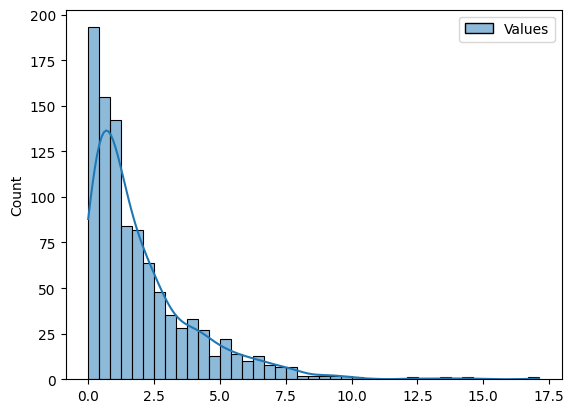

In [27]:
sns.histplot(df, kde=True);

In [30]:
df.describe()

,Values
count,1000.000000
mean,2.007080
std,2.059218
min,0.001092
25%,0.569010
50%,1.312952
75%,2.673183
max,17.122062


In [50]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
data = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(data, columns=['Values'])
df.head()
# df.shape, df.size

from sklearn.preprocessing import PowerTransformer
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo    = PowerTransformer(method='yeo-johnson')
# df['box_kox'] = pt_boxcox.fit_tranform(df['Values'])
# df['box_kox'] = pt_boxcox.fit_transform(df)
df['pt_yeo'] =  pt_yeo.fit_transform(df)
df.head()

,Values,pt_yeo
0,1.591749,0.179335
1,2.511862,0.677331
2,1.846446,0.339698
3,1.574402,0.167607
4,1.102097,-0.202107


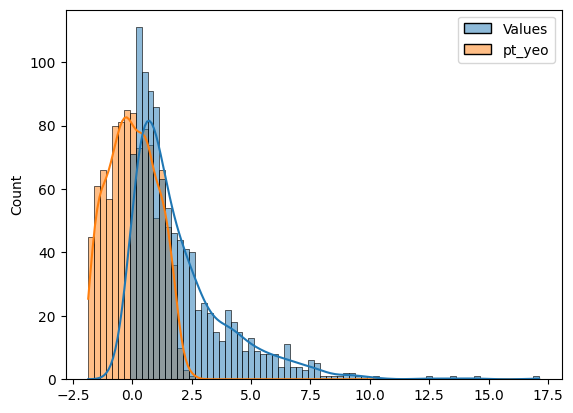

In [46]:
sns.histplot(df, kde=True);

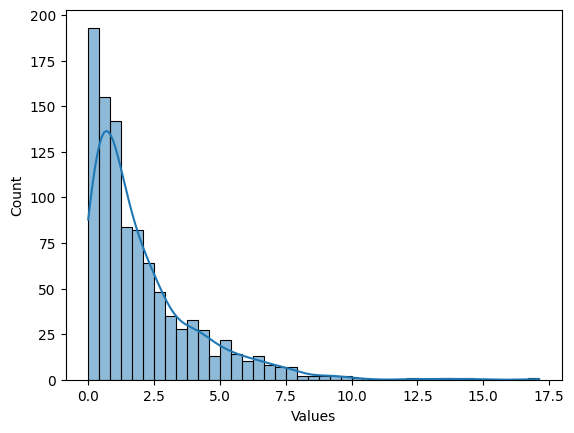

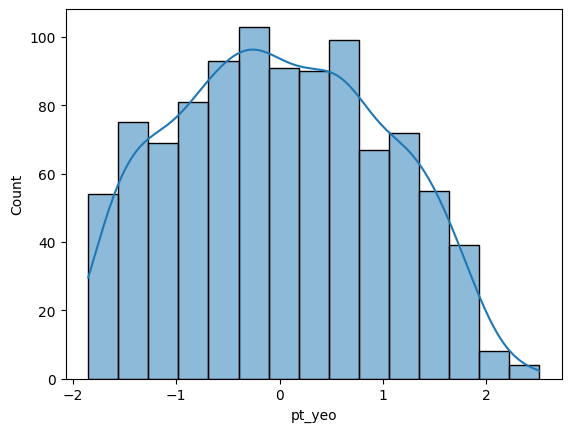

In [51]:
for kol in df.columns:
    sns.histplot(df[kol], kde=True)
    plt.show()

In [53]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
data = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(data, columns=['Values'])
df.head()
# df.shape, df.size

from sklearn.preprocessing import PowerTransformer, QuantileTransformer
pt_boxcox = PowerTransformer(method='box-cox')
pt_yeo    = PowerTransformer(method='yeo-johnson')
Q_T = QuantileTransformer(output_distribution='normal')

# df['box_kox'] = pt_boxcox.fit_tranform(df['Values'])
# df['box_kox'] = pt_boxcox.fit_transform(df)
# df['pt_yeo'] =  pt_yeo.fit_transform(df)
df['Q_Normalization'] = Q_T.fit_transform(df)
df.head()

,Values,Q_Normalization
0,1.591749,0.162552
1,2.511862,0.587964
2,1.846446,0.286135
3,1.574402,0.157469
4,1.102097,-0.154930


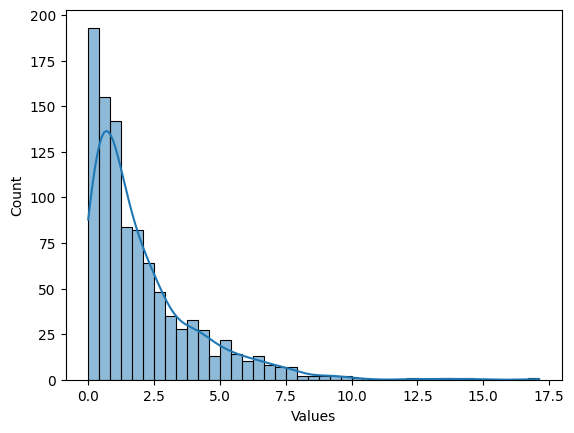

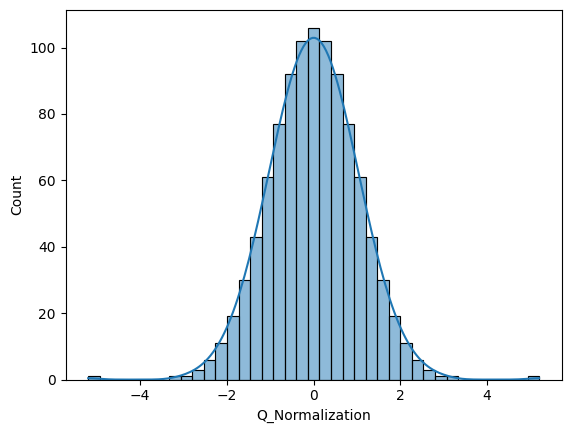

In [54]:
for kol in df.columns:
    sns.histplot(df[kol], kde=True)
    plt.show()

# L2 Normalization.

In [55]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm = 'l2')
print(data)
print(";;;;;;;;;;;;;;;;;;;;;;;;;;;;;")
print(normalizer.fit_transform(data))

[[1, 1, 1], [1, 1, 0], [1, 0, 0]]
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization.

In [56]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm = 'l1')
print(data)
print(";;;;;;;;;;;;;;;;;;;;;;;;;;;;;")
print(normalizer.fit_transform(data))

[[1, 1, 1], [1, 1, 0], [1, 0, 0]]
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log transformation

   Values
0       1
1       5
2      10
3      15
4      20


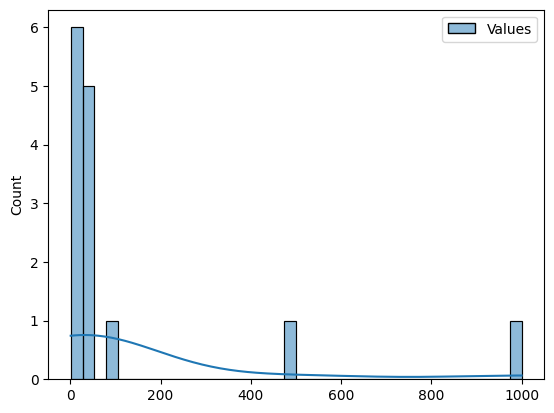

In [61]:
import pandas as pd
import numpy as np

data = {'Values': [1, 5, 10, 15, 20, 25, 30, 35,40, 45, 50, 100, 500,1000]}
df = pd.DataFrame(data)
print(df.head())

sns.histplot(df, kde=True);

In [62]:
df['log_values'] = np.log(df['Values'])
df.head()

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,15,2.708050
4,20,2.995732


<Axes: ylabel='Count'>

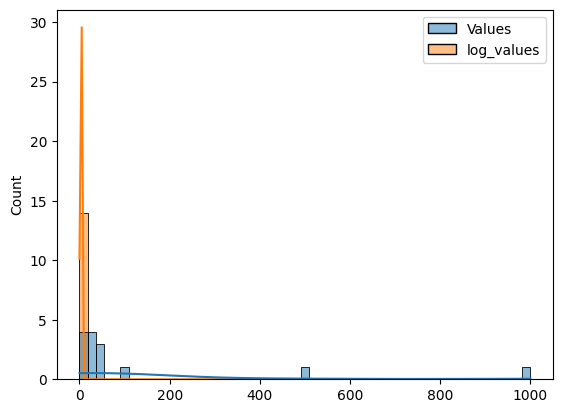

In [63]:
sns.histplot(df, kde=True)

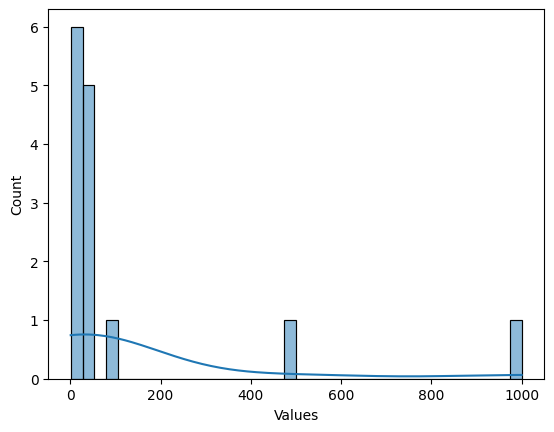

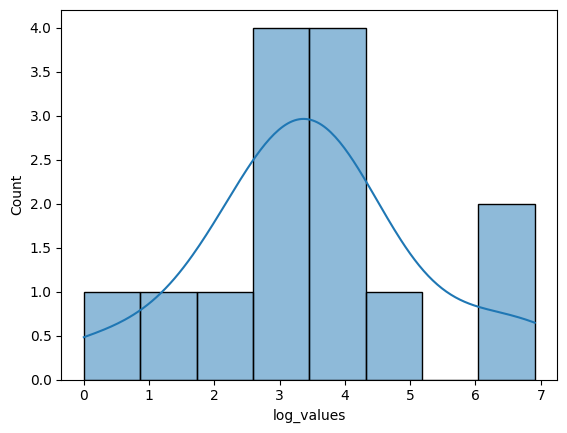

In [65]:
for kol in df.columns:
    sns.histplot(df[kol], kde=True)
    plt.show()